In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# About Dataset
Context
This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

Content
The datasets consists of several medical predictor variables and one target variable, Outcome. Predictor variables includes the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.

# Exploratory Data Analysis (EDA)

In [2]:
df = pd.read_csv('diabetes.csv')

In [3]:
df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
df.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  0.078000   21.000000    0.000000  
25%     27.300000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

C:\Users\nicow\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 6000x6000 with 0 Axes>

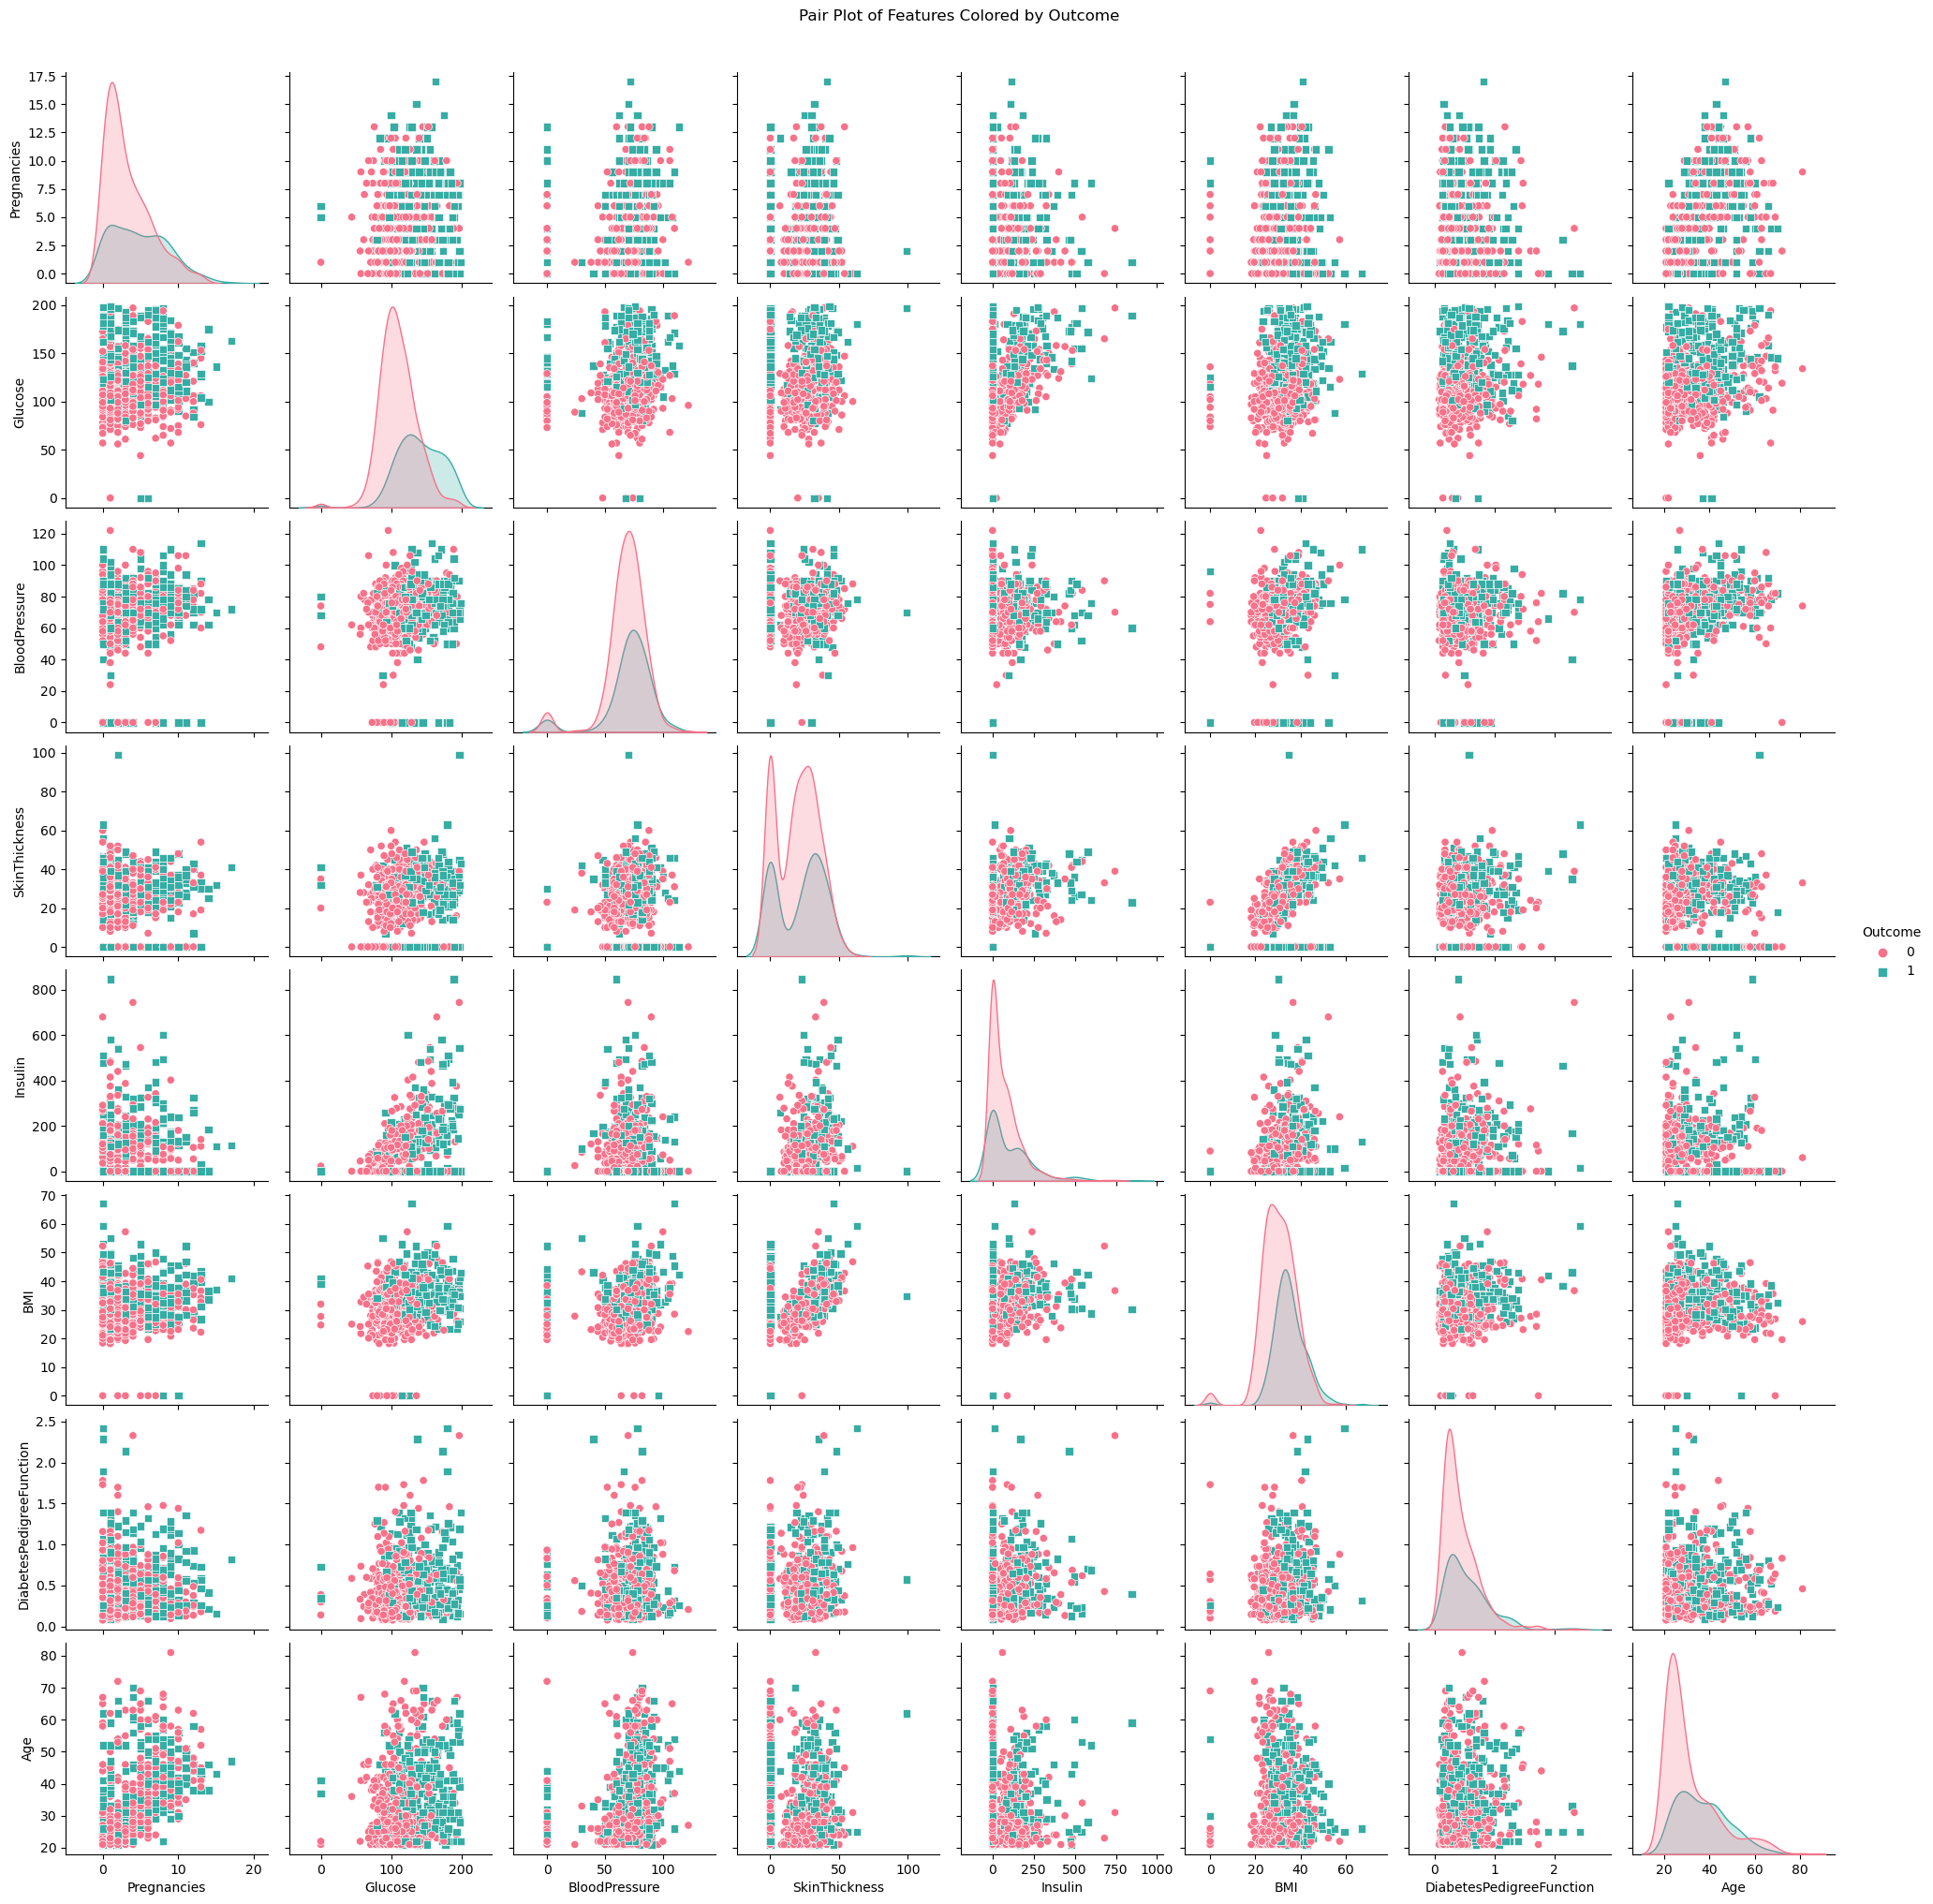

In [6]:
# Pair plot to observe pairwise relationships between features colored by outcome
plt.figure(figsize=(30,30), dpi=200)
sns.pairplot(df, hue='Outcome', diag_kind='kde', markers=["o", "s"], palette='husl')
plt.suptitle('Pair Plot of Features Colored by Outcome', y=1.02)
plt.show()

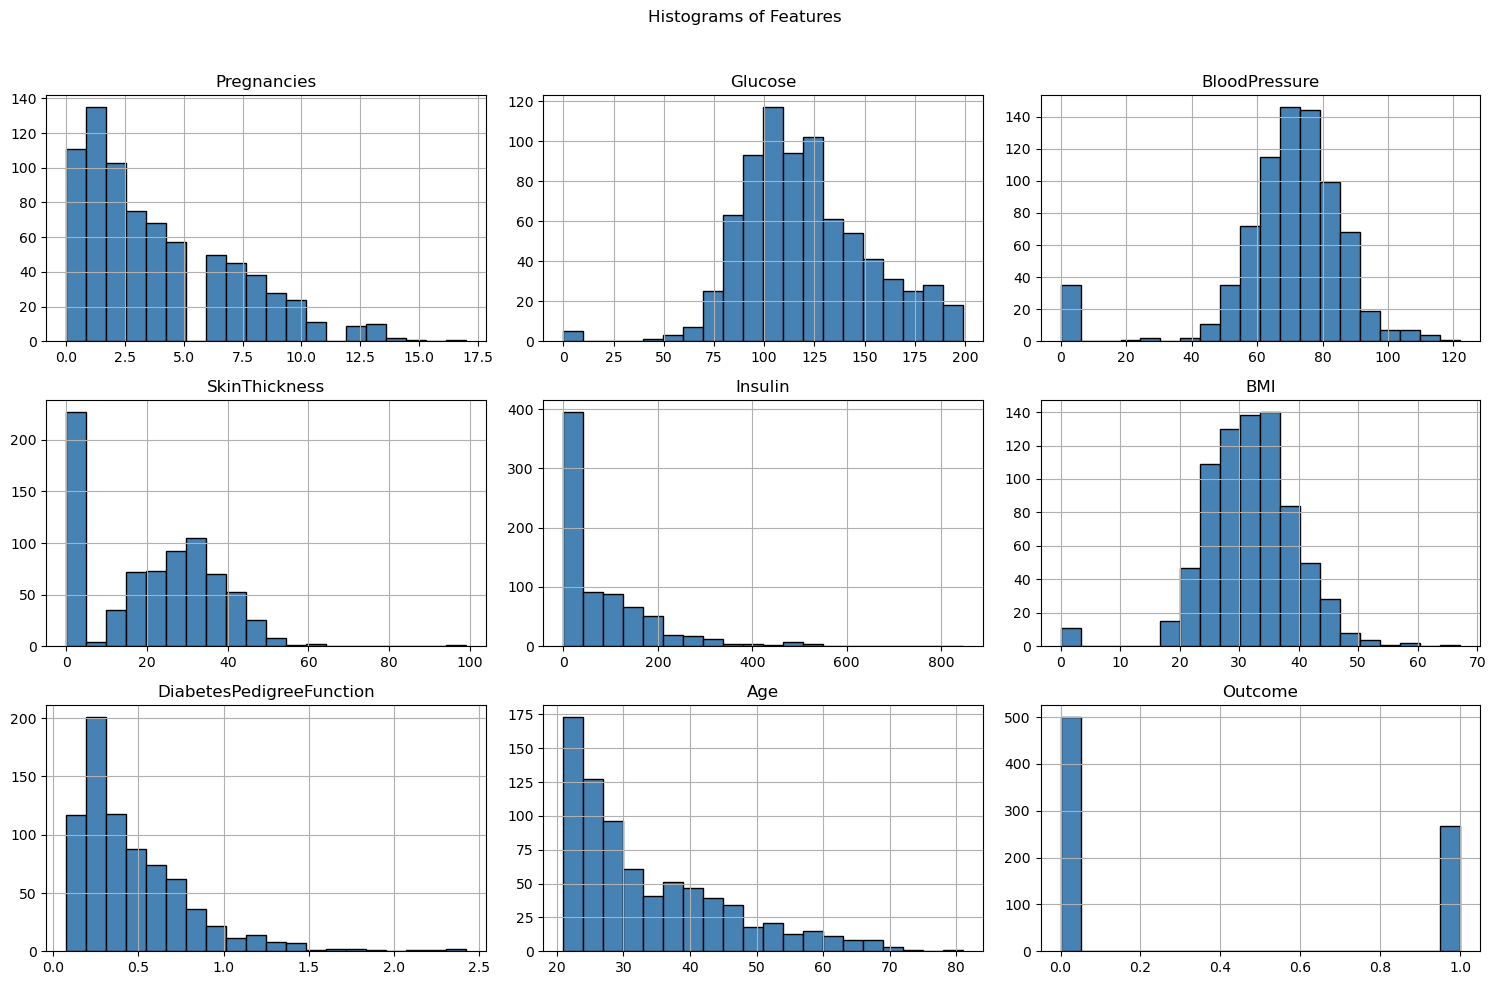

In [7]:
df.hist(bins=20, figsize=(15, 10), color='steelblue', edgecolor='black')
plt.suptitle('Histograms of Features')
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

# Dealing with missing values (0) 

In [8]:
df_zeros = df[(df['BloodPressure'] == 0) | (df['Insulin'] == 0) | (df['SkinThickness']== 0) | (df['Glucose'] ==0) | (df['BMI'] ==0)]

In [9]:
len(df_zeros) # We have too many values with 0 'we assume that none of them can actually be zero as they will never have this value in real life, therefore, we will replace them

376

We will start dealing with zero values feature by feature to replace them with a good estimator.

### BloodPressure = 0 

In [10]:
df[df['BloodPressure'] != 0]['BloodPressure'].mean()

72.40518417462484

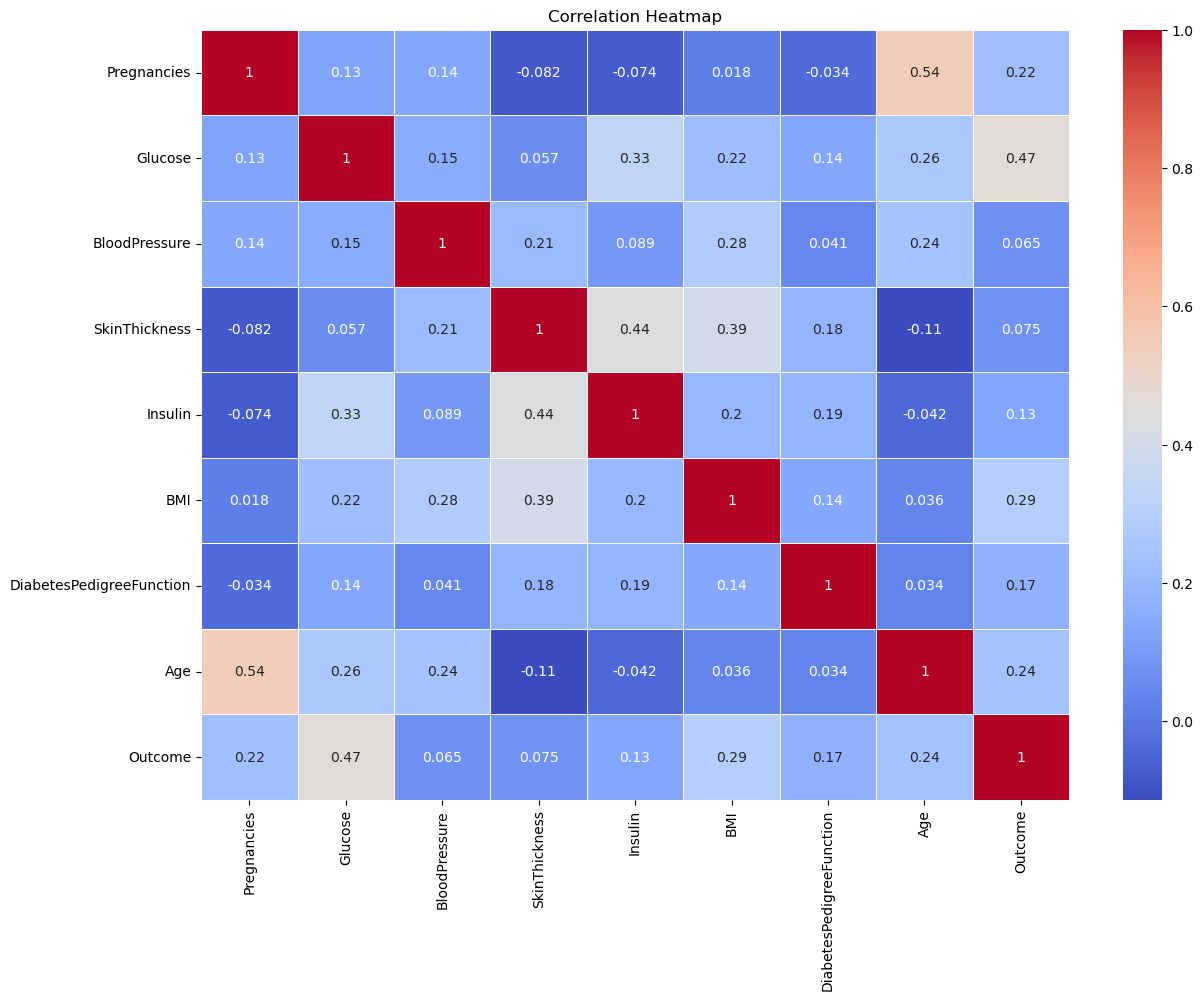

In [11]:
plt.figure(figsize=(14, 10))
correlation_matrix = df.corr(numeric_only=True)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

<Axes: xlabel='BMI', ylabel='BloodPressure'>

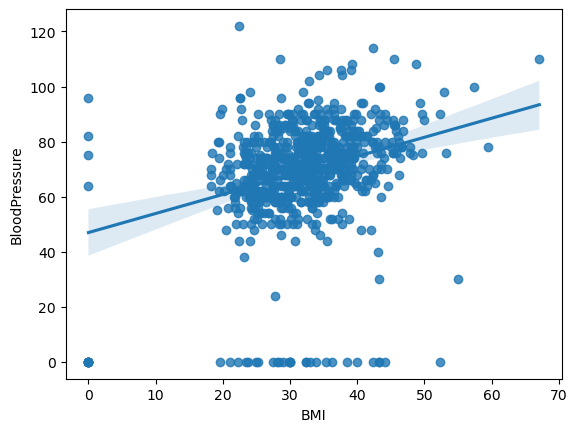

In [12]:
sns.regplot(data=df, x= 'BMI', y = 'BloodPressure') # We detect a positive correlation between 'BMI' and  'BloodPressure', so we will use this discovery to replace missing 'BloodPressure' values ("zero")

In [110]:
df[(df['BloodPressure'] == 0) & (df['BMI'] != 0)] # Let's calculate the mean for 'BMI' non null values where 'BloodPressure' = 0, in  order to get a range of the missig 'BloodPressure' values.

Empty DataFrame
Columns: [Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age, Outcome]
Index: []

In [14]:
df[(df['BloodPressure'] == 0) & (df['BMI'] != 0)]['BMI'].mean() # Mean of 'BMI' values where 'BloodPressure' is equal to zero

32.13214285714285

In [15]:
df[(df['BMI'] >= 31) & (df['BMI']<= 33)]['BloodPressure'].mean()#  Mean for the 'BloodPressure' that we will use to fill the zero values

71.15116279069767

In [16]:
Blood_mean_zeros = df[(df['BMI'] >= 31) & (df['BMI']<= 33)]['BloodPressure'].mean()

In [17]:
df.loc[df['BloodPressure'] == 0, 'BloodPressure'] = Blood_mean_zeros

In [18]:
df['BloodPressure'].mean()

72.3480347625969

### Glucose = 0

In [19]:
df.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      72.348035      20.536458   79.799479   
std       3.369578   31.972618      12.099177      15.952218  115.244002   
min       0.000000    0.000000      24.000000       0.000000    0.000000   
25%       1.000000   99.000000      64.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  0.078000   21.000000    0.000000  
25%     27.300000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

In [20]:
df[df['Glucose'] != 0]['Glucose'].mean()

121.6867627785059

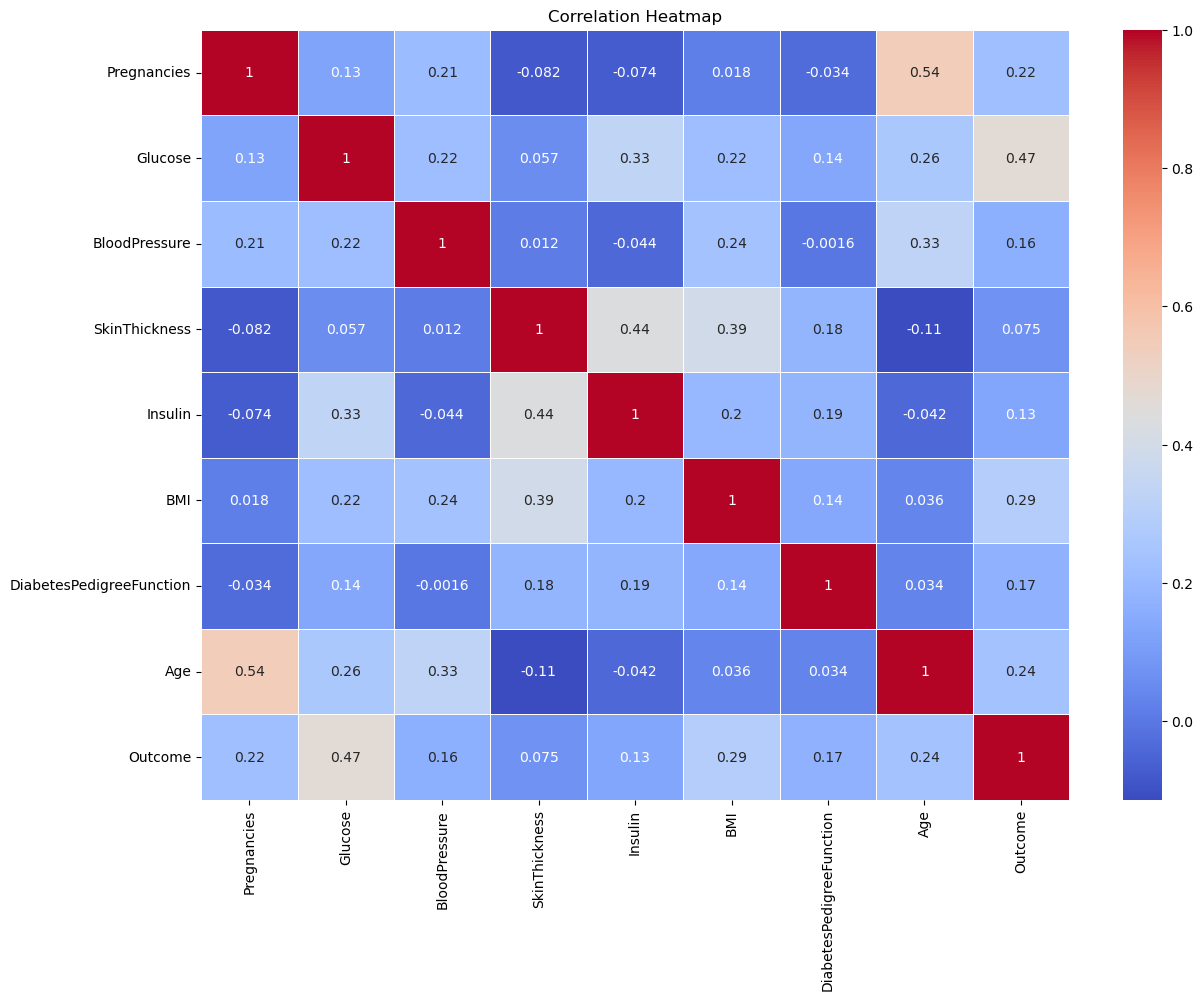

In [21]:
plt.figure(figsize=(14, 10))
correlation_matrix = df.corr(numeric_only=True)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show() 
# 'Glucose has highest correlation with 'Insulin'

<Axes: xlabel='Insulin', ylabel='Glucose'>

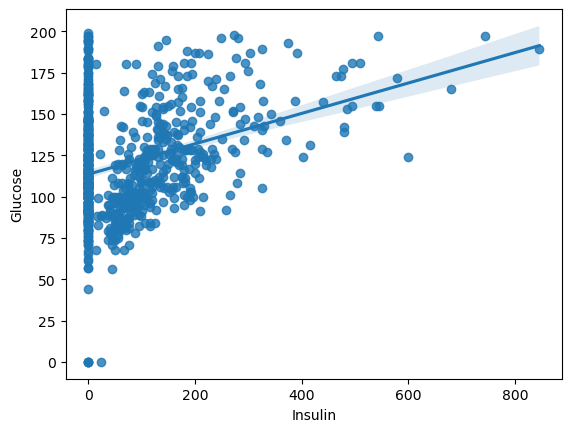

In [22]:
sns.regplot(data=df, x= 'Insulin', y = 'Glucose') # 'Glucose has highest correlation with 'Insulin'

In [23]:
df[df['Glucose'] == 0]

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
75             1        0           48.0             20        0  24.7   
182            1        0           74.0             20       23  27.7   
342            1        0           68.0             35        0  32.0   
349            5        0           80.0             32        0  41.0   
502            6        0           68.0             41        0  39.0   

     DiabetesPedigreeFunction  Age  Outcome  
75                      0.140   22        0  
182                     0.299   21        0  
342                     0.389   22        0  
349                     0.346   37        1  
502                     0.727   41        1

In [24]:
df[(df['Glucose'] == 0) & (df['Insulin'] != 0)] # only 1 datapoint, may be no representative, let's explore with 'BloodPressure' which is the 2nd feature that ' Glucose' has more correlation with

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
182            1        0           74.0             20       23  27.7   

     DiabetesPedigreeFunction  Age  Outcome  
182                     0.299   21        0

<Axes: xlabel='BloodPressure', ylabel='Glucose'>

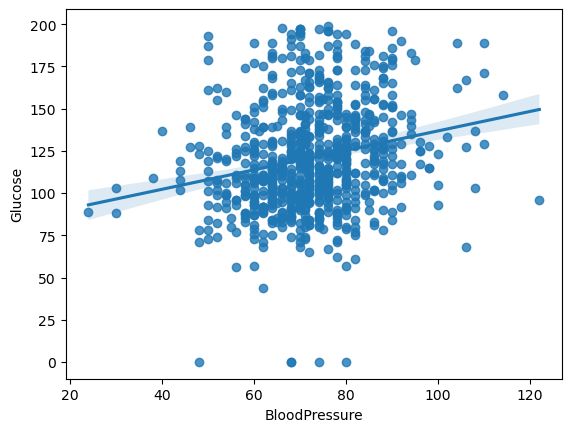

In [25]:
sns.regplot(data=df, x= 'BloodPressure', y = 'Glucose')

In [26]:
df[(df['Glucose'] == 0) & (df['BloodPressure'] != 0)] # we have more representativeness for 'Glucose' = 0 where 'BloodPressure' is not null

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
75             1        0           48.0             20        0  24.7   
182            1        0           74.0             20       23  27.7   
342            1        0           68.0             35        0  32.0   
349            5        0           80.0             32        0  41.0   
502            6        0           68.0             41        0  39.0   

     DiabetesPedigreeFunction  Age  Outcome  
75                      0.140   22        0  
182                     0.299   21        0  
342                     0.389   22        0  
349                     0.346   37        1  
502                     0.727   41        1

In [27]:
df[(df['Glucose'] == 0) & (df['BloodPressure'] != 0)]['BloodPressure'].mean()

67.6

In [28]:
df[(df['BloodPressure'] >= 66) & (df['BloodPressure']<= 69)]['Glucose'].mean()

114.64

In [29]:
Glucose_mean_zeros = df[(df['BloodPressure'] >= 66) & (df['BloodPressure']<= 69)]['Glucose'].mean()

In [30]:
df.loc[df['Glucose'] == 0, 'Glucose'] = Glucose_mean_zeros

In [31]:
df['Glucose'].mean()

121.64088541666666

### SkinThickness = 0

In [32]:
df.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  121.640885      72.348035      20.536458   79.799479   
std       3.369578   30.441232      12.099177      15.952218  115.244002   
min       0.000000   44.000000      24.000000       0.000000    0.000000   
25%       1.000000   99.750000      64.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  0.078000   21.000000    0.000000  
25%     27.300000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

In [33]:
df[df['SkinThickness'] != 0]['SkinThickness'].mean()

29.153419593345657

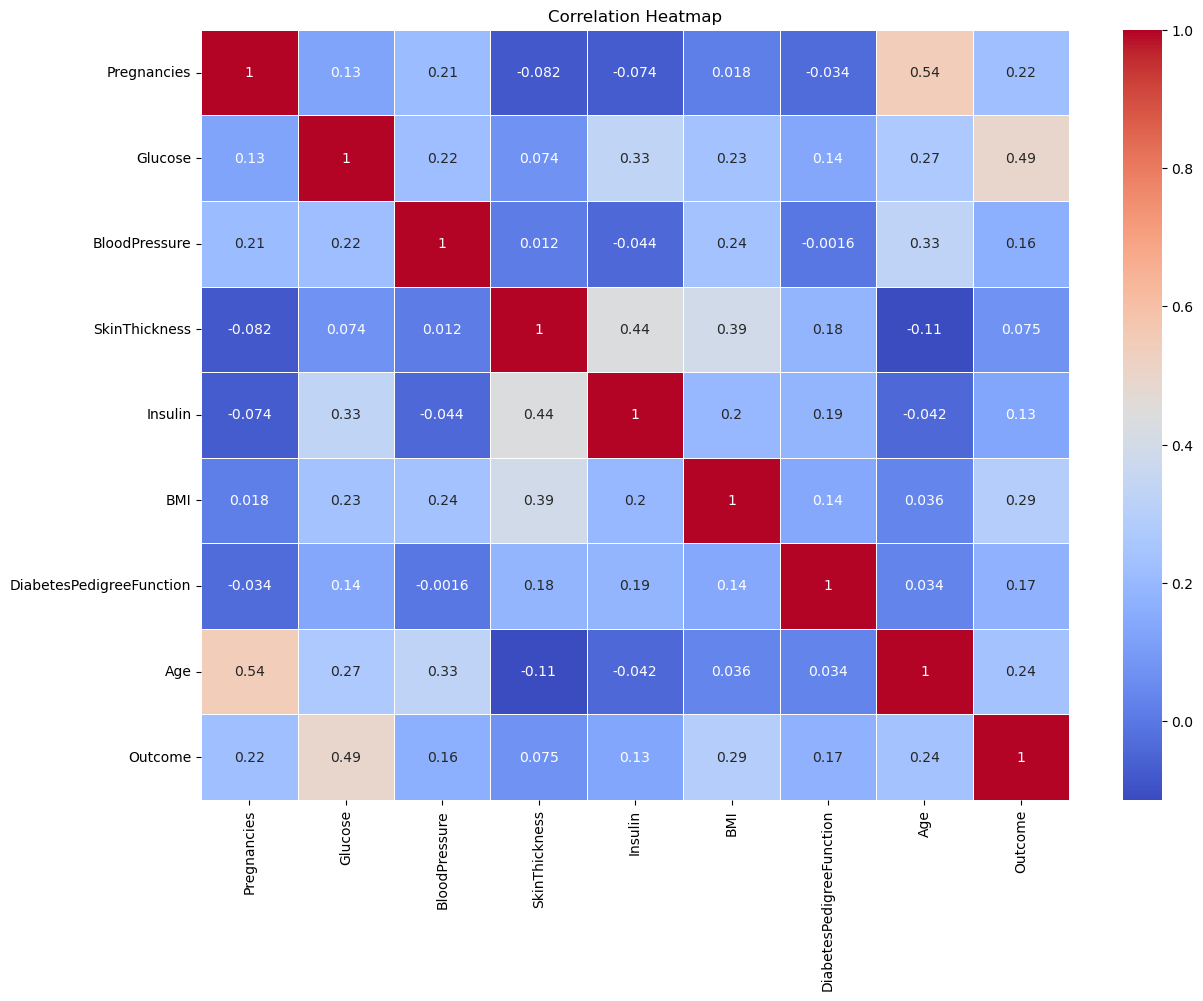

In [34]:
plt.figure(figsize=(14, 10))
correlation_matrix = df.corr(numeric_only=True)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()  
# 'SkinThickness' has highest correlation with 'BMI'

<Axes: xlabel='BMI', ylabel='SkinThickness'>

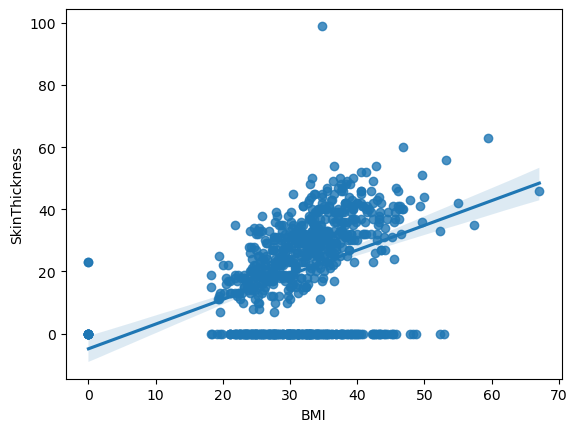

In [35]:
sns.regplot(data=df, x='BMI', y = 'SkinThickness') # 'SkinThickness' has highest correlation with 'BMI'

In [36]:
df[df['SkinThickness'] == 0]

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
2              8    183.0      64.000000              0        0  23.3   
5              5    116.0      74.000000              0        0  25.6   
7             10    115.0      71.151163              0        0  35.3   
9              8    125.0      96.000000              0        0   0.0   
10             4    110.0      92.000000              0        0  37.6   
..           ...      ...            ...            ...      ...   ...   
757            0    123.0      72.000000              0        0  36.3   
758            1    106.0      76.000000              0        0  37.5   
759            6    190.0      92.000000              0        0  35.5   
762            9     89.0      62.000000              0        0  22.5   
766            1    126.0      60.000000              0        0  30.1   

     DiabetesPedigreeFunction  Age  Outcome  
2                       0.672   32        1  
5                       0.201   30        0  
7                       0.134   29        0  
9                       0.232   54        1  
10                      0.191   30        0  
..                        ...  ...      ...  
757                     0.258   52        1  
758                     0.197   26        0  
759                     0.278   66        1  
762                     0.142   33        0  
766                     0.349   47        1  

[227 rows x 9 columns]

In [37]:
df[(df['SkinThickness'] == 0) & (df['BMI'] != 0)]

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
2              8    183.0      64.000000              0        0  23.3   
5              5    116.0      74.000000              0        0  25.6   
7             10    115.0      71.151163              0        0  35.3   
10             4    110.0      92.000000              0        0  37.6   
11            10    168.0      74.000000              0        0  38.0   
..           ...      ...            ...            ...      ...   ...   
757            0    123.0      72.000000              0        0  36.3   
758            1    106.0      76.000000              0        0  37.5   
759            6    190.0      92.000000              0        0  35.5   
762            9     89.0      62.000000              0        0  22.5   
766            1    126.0      60.000000              0        0  30.1   

     DiabetesPedigreeFunction  Age  Outcome  
2                       0.672   32        1  
5                       0.201   30        0  
7                       0.134   29        0  
10                      0.191   30        0  
11                      0.537   34        1  
..                        ...  ...      ...  
757                     0.258   52        1  
758                     0.197   26        0  
759                     0.278   66        1  
762                     0.142   33        0  
766                     0.349   47        1  

[218 rows x 9 columns]

In [38]:
df[(df['SkinThickness'] == 0) & (df['BMI'] != 0)]['BMI'].mean()

31.373853211009173

In [39]:
df[(df['BMI'] >= 30) & (df['BMI']<= 32)]['SkinThickness'].mean()

18.155555555555555

In [40]:
SkinThickess_mean_zeros = df[(df['BMI'] >= 30) & (df['BMI']<= 32)]['SkinThickness'].mean()

In [41]:
df.loc[df['SkinThickness'] == 0, 'SkinThickness'] = SkinThickess_mean_zeros

In [42]:
df['SkinThickness'].mean()

25.902748842592597

### Insulin =  0

In [43]:
df.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  121.640885      72.348035      25.902749   79.799479   
std       3.369578   30.441232      12.099177      10.124084  115.244002   
min       0.000000   44.000000      24.000000       7.000000    0.000000   
25%       1.000000   99.750000      64.000000      18.155556    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  0.078000   21.000000    0.000000  
25%     27.300000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

In [44]:
df[df['Insulin'] != 0]['Insulin'].mean()

155.5482233502538

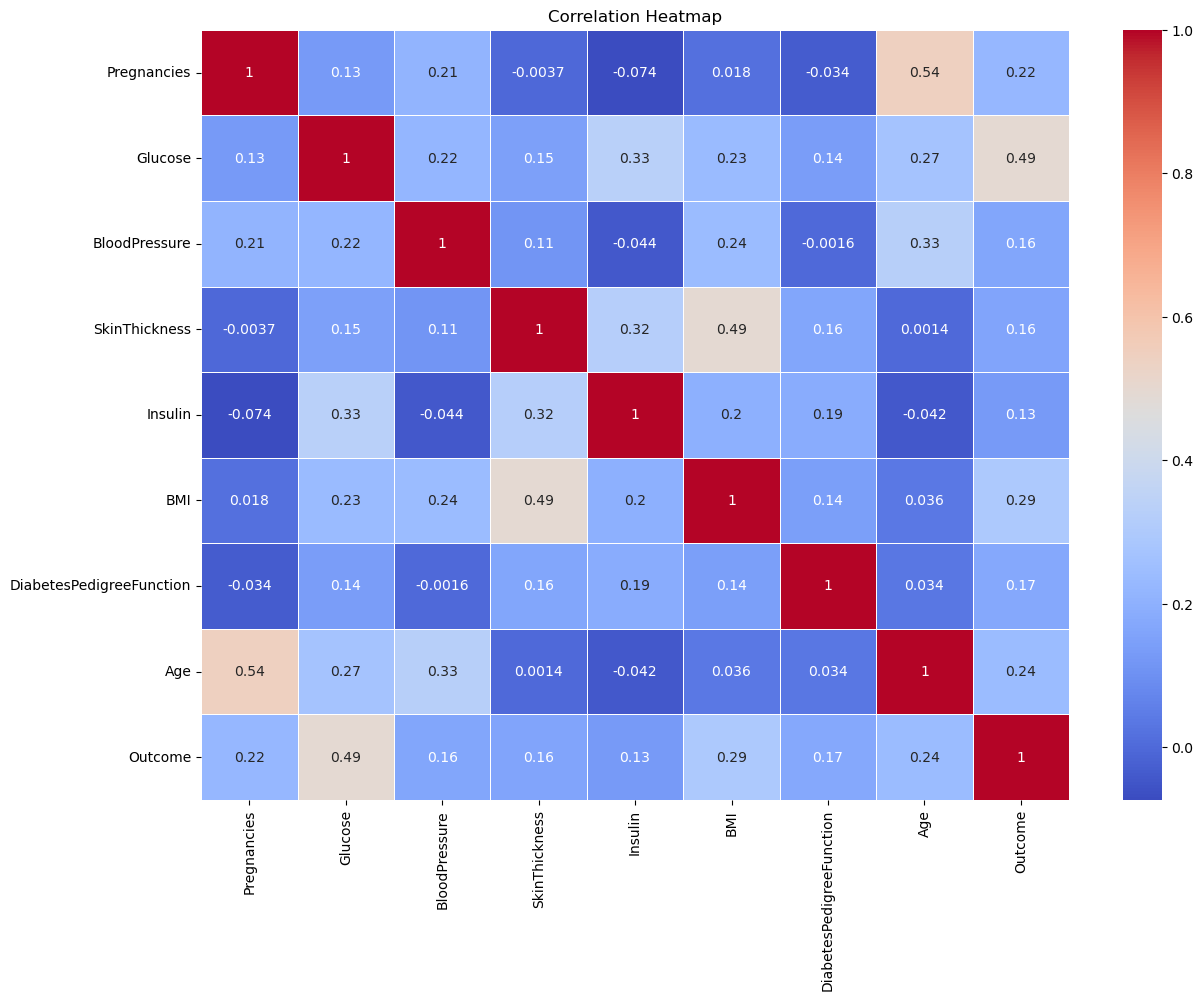

In [45]:
plt.figure(figsize=(14, 10))
correlation_matrix = df.corr(numeric_only=True)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()  
# 'Insulin' has highest correlation with 'Glucose'

<Axes: xlabel='Glucose', ylabel='Insulin'>

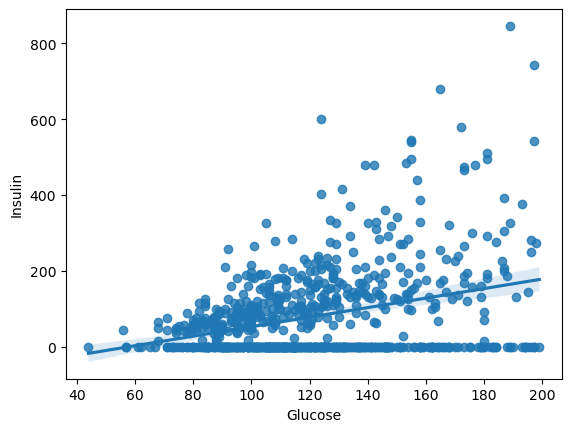

In [46]:
sns.regplot(data=df, x='Glucose', y = 'Insulin') # 'Insulin' has highest correlation with 'Glucose'

In [47]:
df[df['Insulin'] == 0]

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6    148.0      72.000000      35.000000        0  33.6   
1              1     85.0      66.000000      29.000000        0  26.6   
2              8    183.0      64.000000      18.155556        0  23.3   
5              5    116.0      74.000000      18.155556        0  25.6   
7             10    115.0      71.151163      18.155556        0  35.3   
..           ...      ...            ...            ...      ...   ...   
761            9    170.0      74.000000      31.000000        0  44.0   
762            9     89.0      62.000000      18.155556        0  22.5   
764            2    122.0      70.000000      27.000000        0  36.8   
766            1    126.0      60.000000      18.155556        0  30.1   
767            1     93.0      70.000000      31.000000        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                       0.351   31        0  
2                       0.672   32        1  
5                       0.201   30        0  
7                       0.134   29        0  
..                        ...  ...      ...  
761                     0.403   43        1  
762                     0.142   33        0  
764                     0.340   27        0  
766                     0.349   47        1  
767                     0.315   23        0  

[374 rows x 9 columns]

In [48]:
df[(df['Insulin'] == 0) & (df['Glucose'] != 0)]

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6    148.0      72.000000      35.000000        0  33.6   
1              1     85.0      66.000000      29.000000        0  26.6   
2              8    183.0      64.000000      18.155556        0  23.3   
5              5    116.0      74.000000      18.155556        0  25.6   
7             10    115.0      71.151163      18.155556        0  35.3   
..           ...      ...            ...            ...      ...   ...   
761            9    170.0      74.000000      31.000000        0  44.0   
762            9     89.0      62.000000      18.155556        0  22.5   
764            2    122.0      70.000000      27.000000        0  36.8   
766            1    126.0      60.000000      18.155556        0  30.1   
767            1     93.0      70.000000      31.000000        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                       0.351   31        0  
2                       0.672   32        1  
5                       0.201   30        0  
7                       0.134   29        0  
..                        ...  ...      ...  
761                     0.403   43        1  
762                     0.142   33        0  
764                     0.340   27        0  
766                     0.349   47        1  
767                     0.315   23        0  

[374 rows x 9 columns]

In [49]:
df[(df['Insulin'] == 0) & (df['Glucose'] != 0)]['Glucose'].mean()

120.63518716577539

In [50]:
df[(df['Glucose'] >= 119) & (df['Glucose']<= 121)]['Insulin'].mean()

68.78571428571429

In [51]:
Insulin_mean_zeros = df[(df['Glucose'] >= 119) & (df['Glucose']<= 121)]['Insulin'].mean()

In [52]:
df.loc[df['Insulin'] == 0, 'Insulin'] = Insulin_mean_zeros

In [53]:
df['Insulin'].mean()


113.29668898809524

### BMI =  0

In [54]:
df.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  121.640885      72.348035      25.902749  113.296689   
std       3.369578   30.441232      12.099177      10.124084   95.455213   
min       0.000000   44.000000      24.000000       7.000000   14.000000   
25%       1.000000   99.750000      64.000000      18.155556   68.785714   
50%       3.000000  117.000000      72.000000      23.000000   68.785714   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  0.078000   21.000000    0.000000  
25%     27.300000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

In [55]:
df[df['BMI'] != 0]['BMI'].mean()

32.457463672391015

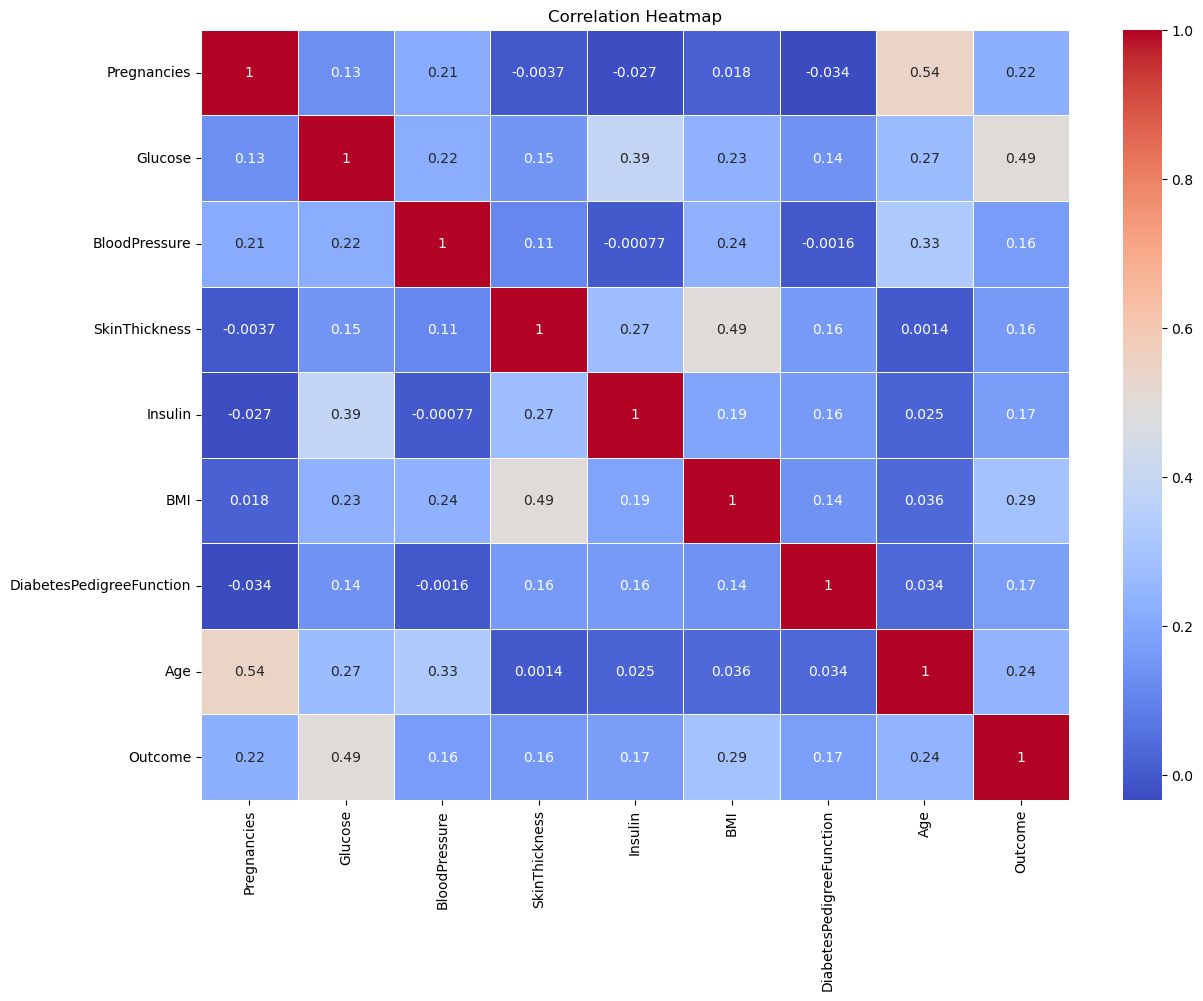

In [56]:
plt.figure(figsize=(14, 10))
correlation_matrix = df.corr(numeric_only=True)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show() 
# 'BMI' has highest correlation with 'SkinThickness'

<Axes: xlabel='SkinThickness', ylabel='BMI'>

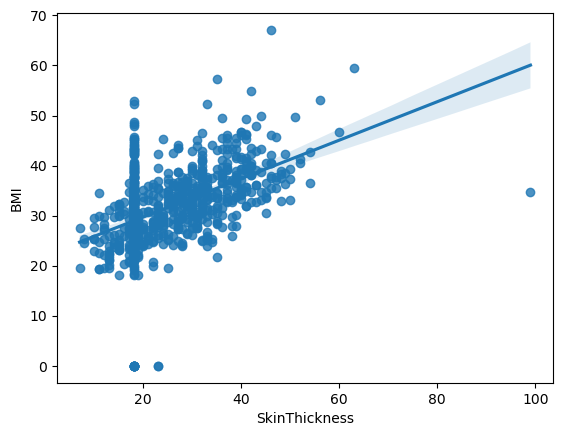

In [57]:
sns.regplot(data=df, x='SkinThickness', y = 'BMI') # 'BMI' has highest correlation with 'SkinThickness'

In [58]:
df[df['BMI'] == 0]

Pregnancies  Glucose  BloodPressure  SkinThickness    Insulin  BMI  \
9              8    125.0      96.000000      18.155556  68.785714  0.0   
49             7    105.0      71.151163      18.155556  68.785714  0.0   
60             2     84.0      71.151163      18.155556  68.785714  0.0   
81             2     74.0      71.151163      18.155556  68.785714  0.0   
145            0    102.0      75.000000      23.000000  68.785714  0.0   
371            0    118.0      64.000000      23.000000  89.000000  0.0   
426            0     94.0      71.151163      18.155556  68.785714  0.0   
494            3     80.0      71.151163      18.155556  68.785714  0.0   
522            6    114.0      71.151163      18.155556  68.785714  0.0   
684            5    136.0      82.000000      18.155556  68.785714  0.0   
706           10    115.0      71.151163      18.155556  68.785714  0.0   

     DiabetesPedigreeFunction  Age  Outcome  
9                       0.232   54        1  
49                      0.305   24        0  
60                      0.304   21        0  
81                      0.102   22        0  
145                     0.572   21        0  
371                     1.731   21        0  
426                     0.256   25        0  
494                     0.174   22        0  
522                     0.189   26        0  
684                     0.640   69        0  
706                     0.261   30        1

In [59]:
df[(df['BMI'] == 0) & (df['SkinThickness'] != 0)]

Pregnancies  Glucose  BloodPressure  SkinThickness    Insulin  BMI  \
9              8    125.0      96.000000      18.155556  68.785714  0.0   
49             7    105.0      71.151163      18.155556  68.785714  0.0   
60             2     84.0      71.151163      18.155556  68.785714  0.0   
81             2     74.0      71.151163      18.155556  68.785714  0.0   
145            0    102.0      75.000000      23.000000  68.785714  0.0   
371            0    118.0      64.000000      23.000000  89.000000  0.0   
426            0     94.0      71.151163      18.155556  68.785714  0.0   
494            3     80.0      71.151163      18.155556  68.785714  0.0   
522            6    114.0      71.151163      18.155556  68.785714  0.0   
684            5    136.0      82.000000      18.155556  68.785714  0.0   
706           10    115.0      71.151163      18.155556  68.785714  0.0   

     DiabetesPedigreeFunction  Age  Outcome  
9                       0.232   54        1  
49                      0.305   24        0  
60                      0.304   21        0  
81                      0.102   22        0  
145                     0.572   21        0  
371                     1.731   21        0  
426                     0.256   25        0  
494                     0.174   22        0  
522                     0.189   26        0  
684                     0.640   69        0  
706                     0.261   30        1

In [60]:
df[(df['BMI'] == 0) & (df['SkinThickness'] != 0)]['SkinThickness'].mean()

19.03636363636364

In [61]:
df[(df['SkinThickness'] >= 18) & (df['SkinThickness']<= 20)]['BMI'].mean()

29.610791366906472

In [62]:
BMI_mean_zeros = df[(df['SkinThickness'] >= 18) & (df['SkinThickness']<= 20)]['BMI'].mean()

In [63]:
df.loc[df['BMI'] == 0, 'BMI'] = BMI_mean_zeros

In [64]:
df['BMI'].mean()

32.416691022182256

# Checking Imbalance Class

In [65]:
df['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [66]:
yes = df[df['Outcome'] == 1]['Outcome'].count()


In [67]:
no = df[df['Outcome'] == 0]['Outcome'].count()

In [68]:
yes/(yes+no)*100 #Diabetes yes

34.89583333333333

In [69]:
no/(yes+no)*100 #Diabetes no

65.10416666666666

We conclude that imbalance class is not a big deal, as it just represents about 1/3 of label data.

# Finally we are able to continue with our ML Model

In [70]:
df.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  121.640885      72.348035      25.902749  113.296689   
std       3.369578   30.441232      12.099177      10.124084   95.455213   
min       0.000000   44.000000      24.000000       7.000000   14.000000   
25%       1.000000   99.750000      64.000000      18.155556   68.785714   
50%       3.000000  117.000000      72.000000      23.000000   68.785714   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    32.416691                  0.471876   33.240885    0.348958  
std      6.883477                  0.331329   11.760232    0.476951  
min     18.200000                  0.078000   21.000000    0.000000  
25%     27.500000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

# Defining our matrix X and y (Features and Label)

In [71]:
X = df.drop('Outcome', axis=1)

In [72]:
y = df['Outcome']

# Train|Test Split

In [73]:
from sklearn.model_selection import train_test_split

In [74]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=28)

# Scaling the Features 

In [75]:
from sklearn.preprocessing import StandardScaler

In [76]:
Scaler = StandardScaler()

In [77]:
Scaled_X_train =  Scaler.fit_transform(X_train)

In [78]:
Scaled_X_test =  Scaler.transform(X_test)

# Trying on different ML Models

In [79]:
from sklearn.ensemble import GradientBoostingClassifier

In [80]:
gbc = GradientBoostingClassifier(random_state=28)
gbc.fit(Scaled_X_train, y_train)

GradientBoostingClassifier(random_state=28)

In [81]:
from sklearn.ensemble import RandomForestClassifier

In [82]:
rfc = RandomForestClassifier(random_state=28)
rfc.fit(Scaled_X_train, y_train)

RandomForestClassifier(random_state=28)

In [83]:
from sklearn.ensemble import AdaBoostClassifier

In [84]:
abc = AdaBoostClassifier(random_state=28)
abc.fit(Scaled_X_train, y_train)

AdaBoostClassifier(random_state=28)

In [85]:
from sklearn.svm import SVC

In [86]:
svc = SVC()
svc.fit(Scaled_X_train, y_train)

SVC()

In [87]:
from sklearn.linear_model import LogisticRegression

In [88]:
lr = LogisticRegression()
lr.fit(Scaled_X_train, y_train)

LogisticRegression()

# Finding the Best Model

In [89]:
from sklearn.metrics import confusion_matrix, classification_report

In [90]:
def performance(model):
    preds = model.predict(Scaled_X_test)
    print(confusion_matrix(y_test, preds))
    print(classification_report(y_test, preds))

In [91]:
print('Performance GBC')
performance(gbc)

Performance GBC
[[125  26]
 [ 38  42]]
              precision    recall  f1-score   support

           0       0.77      0.83      0.80       151
           1       0.62      0.53      0.57        80

    accuracy                           0.72       231
   macro avg       0.69      0.68      0.68       231
weighted avg       0.72      0.72      0.72       231



In [92]:
print('Performance RFC')
performance(rfc)

Performance RFC
[[128  23]
 [ 34  46]]
              precision    recall  f1-score   support

           0       0.79      0.85      0.82       151
           1       0.67      0.57      0.62        80

    accuracy                           0.75       231
   macro avg       0.73      0.71      0.72       231
weighted avg       0.75      0.75      0.75       231



In [93]:
print('Performance ABC')
performance(abc)

Performance ABC
[[127  24]
 [ 30  50]]
              precision    recall  f1-score   support

           0       0.81      0.84      0.82       151
           1       0.68      0.62      0.65        80

    accuracy                           0.77       231
   macro avg       0.74      0.73      0.74       231
weighted avg       0.76      0.77      0.76       231



In [94]:
print('Performance SVC')
performance(svc)

Performance SVC
[[133  18]
 [ 38  42]]
              precision    recall  f1-score   support

           0       0.78      0.88      0.83       151
           1       0.70      0.53      0.60        80

    accuracy                           0.76       231
   macro avg       0.74      0.70      0.71       231
weighted avg       0.75      0.76      0.75       231



In [95]:
print('Performance LR')
performance(lr)

Performance LR
[[134  17]
 [ 33  47]]
              precision    recall  f1-score   support

           0       0.80      0.89      0.84       151
           1       0.73      0.59      0.65        80

    accuracy                           0.78       231
   macro avg       0.77      0.74      0.75       231
weighted avg       0.78      0.78      0.78       231



We will compare two model as they got the highest performance : ABC and LR

# Performing GridSeachCV using Both Models

In [96]:
from sklearn.model_selection import GridSearchCV

# Define parameter grids
param_grid_abc = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.05, 0.1,1]
}
param_grid_lr = [
    {'solver': ['liblinear'], 'penalty': ['l1'], 'C': [0.01, 0.1, 0.25, 1, 5, 10], 'max_iter': [100, 200, 300]},
    {'solver': ['liblinear', 'lbfgs'], 'penalty': ['l2'], 'C': [0.01, 0.1, 0.25, 1, 5, 10], 'max_iter': [100, 200, 300]}]


# GridSearchCV for AdaBoost
grid_abc = GridSearchCV(AdaBoostClassifier(random_state=28), param_grid_abc, cv=5)
grid_abc.fit(Scaled_X_train, y_train)
print("Best parameters for AdaBoost:", grid_abc.best_params_)

# GridSearchCV for Logistic Regression
grid_lr = GridSearchCV(LogisticRegression(random_state=28), param_grid_lr, cv=5)
grid_lr.fit(Scaled_X_train, y_train)
print("Best parameters for Logistic Regression:", grid_lr.best_params_)

# Evaluate the best models
performance(grid_abc.best_estimator_)
performance(grid_lr.best_estimator_)

Best parameters for AdaBoost: {'learning_rate': 0.1, 'n_estimators': 50}
Best parameters for Logistic Regression: {'C': 0.25, 'max_iter': 100, 'penalty': 'l2', 'solver': 'liblinear'}
[[130  21]
 [ 38  42]]
              precision    recall  f1-score   support

           0       0.77      0.86      0.82       151
           1       0.67      0.53      0.59        80

    accuracy                           0.74       231
   macro avg       0.72      0.69      0.70       231
weighted avg       0.74      0.74      0.74       231

[[134  17]
 [ 33  47]]
              precision    recall  f1-score   support

           0       0.80      0.89      0.84       151
           1       0.73      0.59      0.65        80

    accuracy                           0.78       231
   macro avg       0.77      0.74      0.75       231
weighted avg       0.78      0.78      0.78       231



In [97]:
grid_lr.best_params_

{'C': 0.25, 'max_iter': 100, 'penalty': 'l2', 'solver': 'liblinear'}

In [98]:
preds = grid_lr.predict(Scaled_X_test)

We perform best with Logistic Regression, Acurracy of 78% is quite good. Even thought, we perform poor on minority class: 'Output: 1', only achieving 59% of recall for 1 class.
The best hyperparamenters for the Logistic Regression found with GridSearchCV are : {'C': 0.25, 'max_iter': 100, 'penalty': 'l2', 'solver': 'liblinear'}

In [99]:
from sklearn.metrics import roc_curve, auc, roc_auc_score, confusion_matrix

Plotting Interactive Confusion Matrix

In [100]:
cm = confusion_matrix(y_test, preds)

import plotly.figure_factory as ff

# Plot confusion matrix with Plotly
z = cm.tolist()
x = ["Predicted 0", "Predicted 1"]
y = ["Actual 0", "Actual 1"]

fig = ff.create_annotated_heatmap(z, x=x, y=y, colorscale='Blues')
fig.update_layout(title='Confusion Matrix')
fig.show()

The True Positives are 47 out of 80, this is around 59%. This is not great enough, but still OK considering the class imbalance.
The True Negatives are 134 out of 151, this means around 89%. This is a good result.

ROC Curve

In [101]:
# Predict probabilities
y_prob = grid_lr.predict_proba(Scaled_X_test)[:, 1]

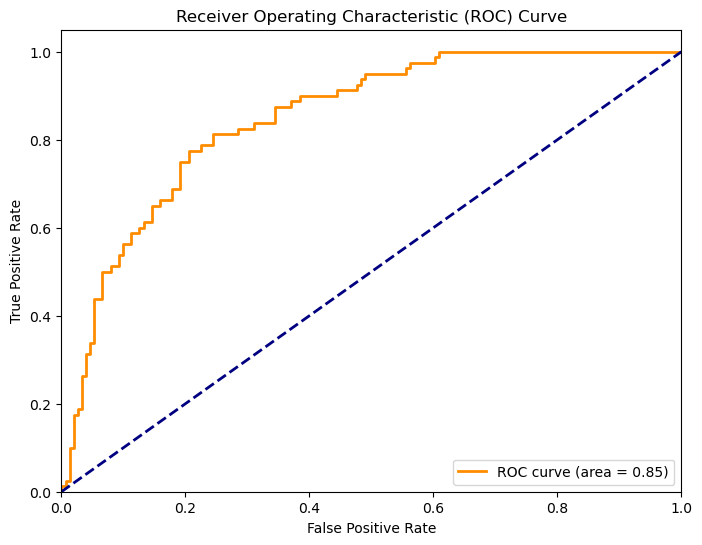

ROC AUC Score: 0.85


In [102]:
# Generate ROC curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Print ROC AUC Score
print(f'ROC AUC Score: {roc_auc:.2f}')

ROC AUC score is approximately 0.85. This indicates that the Logistic Regression model has a good ability to distinguish between the positive and negative classes in the diabetes dataset.

Precision-Recall Curve

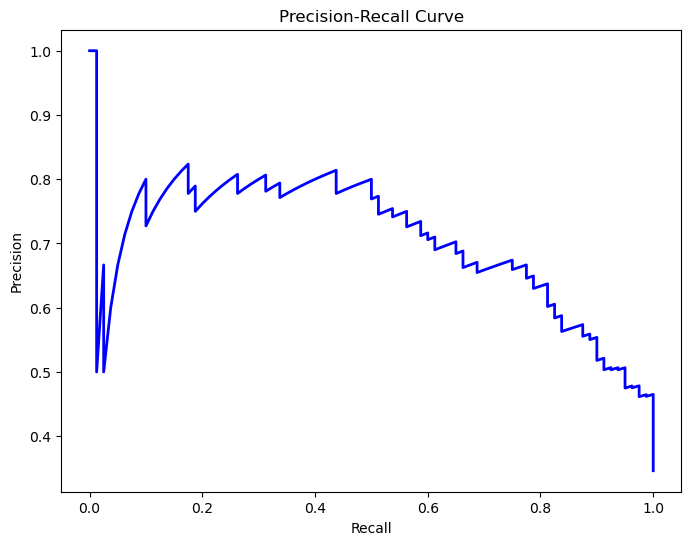

In [103]:
from sklearn.metrics import precision_recall_curve

# Compute Precision-Recall curve
precision, recall, _ = precision_recall_curve(y_test, grid_lr.predict_proba(Scaled_X_test)[:,1])

# Plot Precision-Recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='blue', lw=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

Trade off between precision and Recall. With our model, we are located where Precision is around 80% and Recall around 59% 

Feature Importance

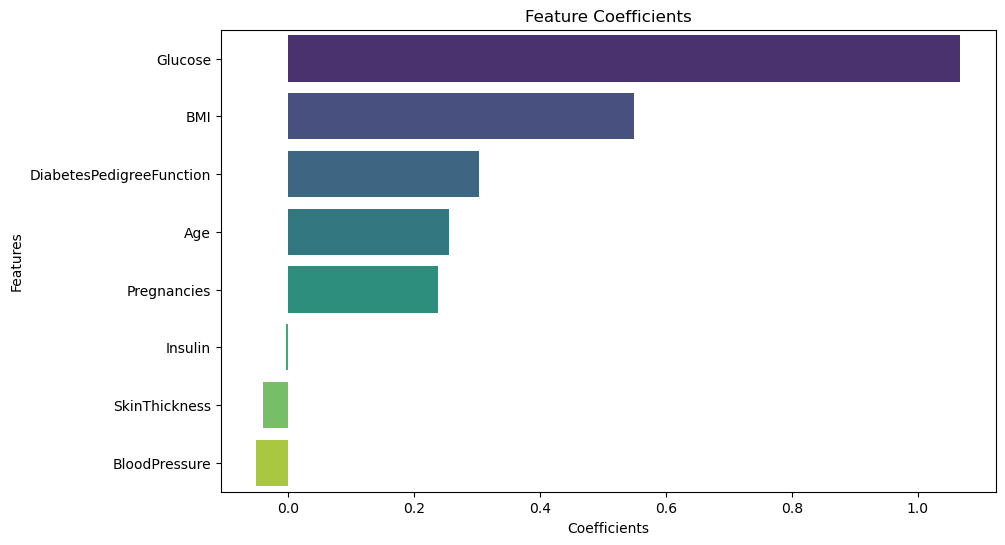

In [104]:
best_model = grid_lr.best_estimator_
coefficients = best_model.coef_[0]
feature_names = X.columns
feature_names = X.columns

# Create a DataFrame for plotting coefficients
coef_df = pd.DataFrame({'Features': feature_names, 'Coefficients': coefficients})
coef_df = coef_df.sort_values(by='Coefficients', ascending=False)

# Plot coefficients
plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficients', y='Features', data=coef_df, palette='viridis')
plt.title('Feature Coefficients')
plt.show()

In logistic regression, the coefficients represent the log-odds change for a one-unit increase in the feature, assuming all other features are held constant. A positive coefficient indicates that as the feature increases, the log-odds of the target outcome also increase.
For the feature 'Glucose', having a coefficient higher than 1 (in log-odds) means that for every one-unit increase in glucose, the log-odds of the positive outcome (e.g., having diabetes) increases by more than 1. This is reasonable because glucose levels are directly related to diabetes. Higher glucose levels are typically a strong indicator of diabetes, so it makes sense that 'Glucose' would have a significant and positive coefficient in the logistic regression model.

Example Interpretation
Suppose the coefficient for 'Glucose' is 1.5:

The log-odds increase by 1.5 for each unit increase in 'Glucose'.
To convert this to odds, compute 
𝑒
1.5
≈
4.48
e 
1.5
 ≈4.48. This means the odds of the target outcome increase by a factor of approximately 4.48 for each unit increase in 'Glucose'.

# Scaling and Training on all Data

In [106]:
y = df['Outcome']
# Scale the features
scaler = StandardScaler()
Scaled_X = scaler.fit_transform(X)

In [107]:
final_model_lr = grid_lr.fit(Scaled_X, y)

# Saving final Model and Scaler

In [108]:
from joblib import dump, load

In [109]:
# Save the model to a file
joblib_file = "logistic_regression_model.pkl"
dump(final_model_lr, joblib_file)
print(f"Model saved to {joblib_file}")

# Optionally, save the scaler as well for future scaling of new data
scaler_file = "scaler.pkl"
dump(scaler, scaler_file)
print(f"Scaler saved to {scaler_file}")

Model saved to logistic_regression_model.pkl
Scaler saved to scaler.pkl
